## Sprint 13 - Proyecto

### JAVIER CRUZ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

In [2]:
# CARGAR LOS DATOS
df = pd.read_csv('gym_churn_us.csv')

print("=== INFORMACIÓN BÁSICA DEL DATASET ===")
print(f"Forma del dataset: {df.shape}")
print(f"Columnas: {list(df.columns)}")
print("\n=== PRIMERAS 5 FILAS ===")
print(df.head())

=== INFORMACIÓN BÁSICA DEL DATASET ===
Forma del dataset: (4000, 14)
Columnas: ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Churn']

=== PRIMERAS 5 FILAS ===
   gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31             

Ahora realizaré el análisis exploratorio de datos (EDA):

In [3]:
# PASO 1: ANÁLISIS EXPLORATORIO DE DATOS (EDA)

print("=== 1.1 VALORES AUSENTES ===")
print(df.isnull().sum())

print("\n=== 1.2 ESTADÍSTICAS DESCRIPTIVAS ===")
print(df.describe())

print("\n=== 1.3 DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (CHURN) ===")
churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100
print(f"No cancelaron (0): {churn_counts[0]} ({churn_percentage[0]:.1f}%)")
print(f"Cancelaron (1): {churn_counts[1]} ({churn_percentage[1]:.1f}%)")

=== 1.1 VALORES AUSENTES ===
gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

=== 1.2 ESTADÍSTICAS DESCRIPTIVAS ===
            gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000

In [4]:
# COMPARACIÓN DE CARACTERÍSTICAS ENTRE GRUPOS (CHURN vs NO CHURN)
print("=== 1.4 VALORES MEDIOS POR GRUPO DE CANCELACIÓN ===")
churn_comparison = df.groupby('Churn').mean()
print(churn_comparison)

print("\n=== DIFERENCIAS MÁS NOTABLES ===")
for col in df.select_dtypes(include=[np.number]).columns:
    if col != 'Churn':
        no_churn = df[df['Churn'] == 0][col].mean()
        churn = df[df['Churn'] == 1][col].mean()
        diff = abs(churn - no_churn)
        print(f"{col}: No Churn={no_churn:.3f}, Churn={churn:.3f}, Diferencia={diff:.3f}")

=== 1.4 VALORES MEDIOS POR GRUPO DE CANCELACIÓN ===
         gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                     

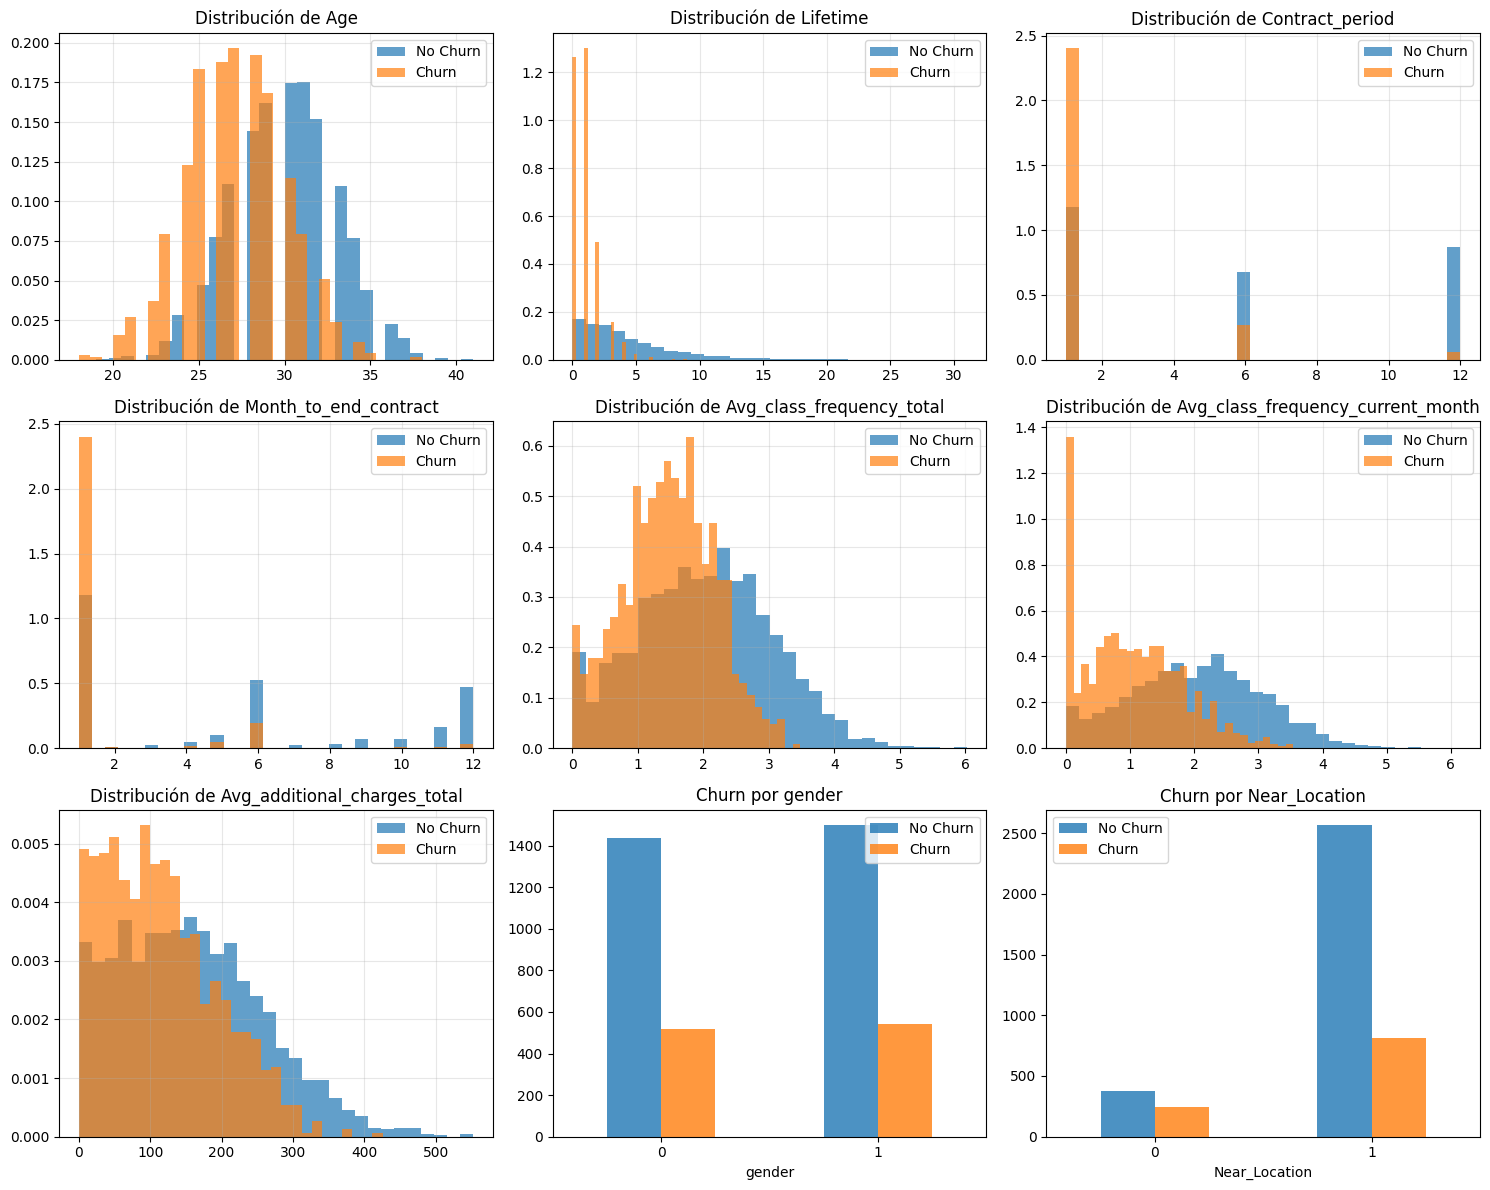

In [5]:
# GRAFICAS - HISTOGRAMAS Y DISTRIBUCIONES
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

# VARIABLES NUMÉRICAS MÁS IMPORTANTES
numeric_vars = ['Age', 'Lifetime', 'Contract_period', 'Month_to_end_contract', 
                'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 
                'Avg_additional_charges_total']

for i, var in enumerate(numeric_vars):
   # GRAFICA HISTOGRAMA PARA CADA GRUPO
    no_churn_data = df[df['Churn'] == 0][var]
    churn_data = df[df['Churn'] == 1][var]
    
    axes[i].hist(no_churn_data, alpha=0.7, label='No Churn', bins=30, density=True)
    axes[i].hist(churn_data, alpha=0.7, label='Churn', bins=30, density=True)
    axes[i].set_title(f'Distribución de {var}')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

# VARIABLES CATEGÓRICAS
categorical_vars = ['gender', 'Near_Location']
for i, var in enumerate(categorical_vars, len(numeric_vars)):
    churn_by_cat = df.groupby([var, 'Churn']).size().unstack()
    churn_by_cat.plot(kind='bar', ax=axes[i], alpha=0.8)
    axes[i].set_title(f'Churn por {var}')
    axes[i].legend(['No Churn', 'Churn'])
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

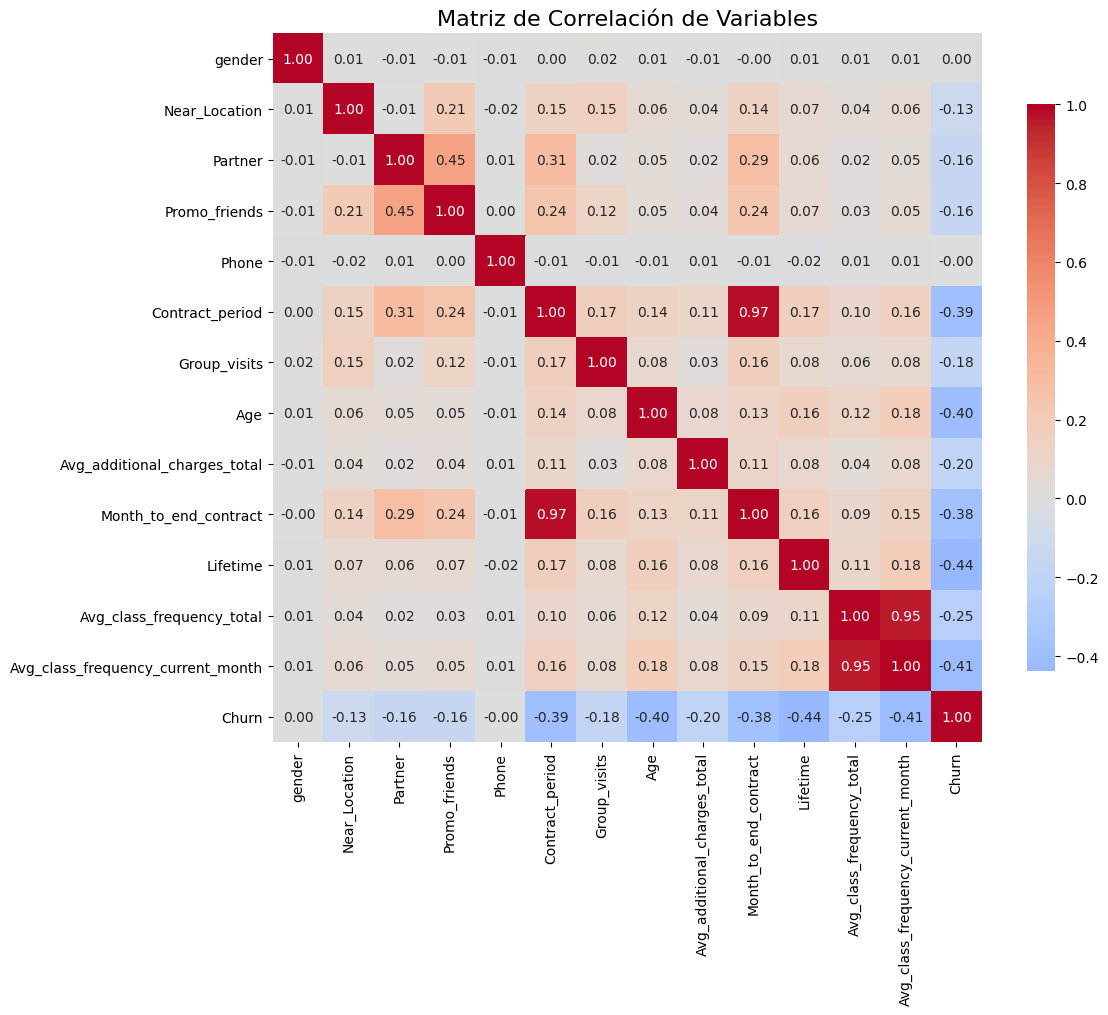

=== CORRELACIONES MÁS FUERTES CON CHURN ===
Lifetime                             0.438220
Avg_class_frequency_current_month    0.412348
Age                                  0.404735
Contract_period                      0.389984
Month_to_end_contract                0.381393
Avg_class_frequency_total            0.249715
Avg_additional_charges_total         0.198697
Group_visits                         0.175325
Promo_friends                        0.162233
Partner                              0.157986
Near_Location                        0.128098
Phone                                0.001177
gender                               0.000708
Name: Churn, dtype: float64


In [6]:
# MATRIZ DE CORRELACIÓN
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlación de Variables', fontsize=16)
plt.tight_layout()
plt.show()

print("=== CORRELACIONES MÁS FUERTES CON CHURN ===")
churn_correlations = correlation_matrix['Churn'].abs().sort_values(ascending=False)
print(churn_correlations[churn_correlations.index != 'Churn'])

## Paso 3. Construir un modelo para predecir la cancelación de usuarios

In [7]:
# CONSTRUCCIÓN DE MODELOS PREDICTIVOS

print("=== PASO 2: MODELOS DE PREDICCIÓN DE CANCELACIÓN ===")

# PREPARACIÓN DE DATOS
X = df.drop('Churn', axis=1)
y = df['Churn']

# DIVISIÓN EN ENTRENAMIENTO Y VALIDACIÓN
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f"Tamaño conjunto entrenamiento: {X_train.shape}")
print(f"Tamaño conjunto validación: {X_valid.shape}")

=== PASO 2: MODELOS DE PREDICCIÓN DE CANCELACIÓN ===
Tamaño conjunto entrenamiento: (3000, 13)
Tamaño conjunto validación: (1000, 13)


In [8]:
# ESTANDARIZACION DE REGRESIÓN LOGÍSTICA 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# MODELO 1: REGRESIÓN LOGÍSTICA
print("\n=== ENTRENANDO REGRESIÓN LOGÍSTICA ===")
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_valid_scaled)

# METRICAS REGRESIÓN LOGÍSTICA 
accuracy_lr = accuracy_score(y_valid, y_pred_lr)
precision_lr = precision_score(y_valid, y_pred_lr)
recall_lr = recall_score(y_valid, y_pred_lr)

print(f"Exactitud: {accuracy_lr:.3f}")
print(f"Precisión: {precision_lr:.3f}")
print(f"Recall: {recall_lr:.3f}")


=== ENTRENANDO REGRESIÓN LOGÍSTICA ===
Exactitud: 0.919
Precisión: 0.868
Recall: 0.819


In [9]:
# MODELO 2: BOSQUE ALEATORIO
print("=== ENTRENANDO BOSQUE ALEATORIO ===")
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_valid)

# MÉTRICAS BOSQUE ALEATORIO
accuracy_rf = accuracy_score(y_valid, y_pred_rf)
precision_rf = precision_score(y_valid, y_pred_rf)
recall_rf = recall_score(y_valid, y_pred_rf)

print(f"Exactitud: {accuracy_rf:.3f}")
print(f"Precisión: {precision_rf:.3f}")
print(f"Recall: {recall_rf:.3f}")

=== ENTRENANDO BOSQUE ALEATORIO ===
Exactitud: 0.918
Precisión: 0.877
Recall: 0.804


In [10]:
# COMPARACIÓN DE MODELOS
print("\n=== COMPARACIÓN DE MODELOS ===")
print("Métrica          | Regresión Logística | Bosque Aleatorio")
print("-" * 55)
print(f"Exactitud        | {accuracy_lr:.3f}             | {accuracy_rf:.3f}")
print(f"Precisión        | {precision_lr:.3f}             | {precision_rf:.3f}")
print(f"Recall           | {recall_lr:.3f}             | {recall_rf:.3f}")

# IMPORTANCIA DE CARACTERÍSTICAS DEL BOSQUE ALEATORIO
print("\n=== IMPORTANCIA DE CARACTERÍSTICAS (BOSQUE ALEATORIO) ===")
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance)


=== COMPARACIÓN DE MODELOS ===
Métrica          | Regresión Logística | Bosque Aleatorio
-------------------------------------------------------
Exactitud        | 0.919             | 0.918
Precisión        | 0.868             | 0.877
Recall           | 0.819             | 0.804

=== IMPORTANCIA DE CARACTERÍSTICAS (BOSQUE ALEATORIO) ===
                              feature  importance
10                           Lifetime    0.298481
12  Avg_class_frequency_current_month    0.168505
7                                 Age    0.132832
11          Avg_class_frequency_total    0.121639
9               Month_to_end_contract    0.086683
5                     Contract_period    0.067090
8        Avg_additional_charges_total    0.066284
6                        Group_visits    0.018724
2                             Partner    0.009227
1                       Near_Location    0.008603
3                       Promo_friends    0.008519
0                              gender    0.008335
4         

## Paso 4. Crear clústeres de usuarios/as

In [11]:
# ESTANDARIZAR LOS DATOS (SIN LA COLUMNA CHURN)
features_for_clustering = df.drop('Churn', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_for_clustering)

print("4.1 ✓ Datos estandarizados")
print(f"Forma de los datos: {X_scaled.shape}")

4.1 ✓ Datos estandarizados
Forma de los datos: (4000, 13)


4.2 Creando dendrograma...


Text(0, 0.5, 'Distancia')

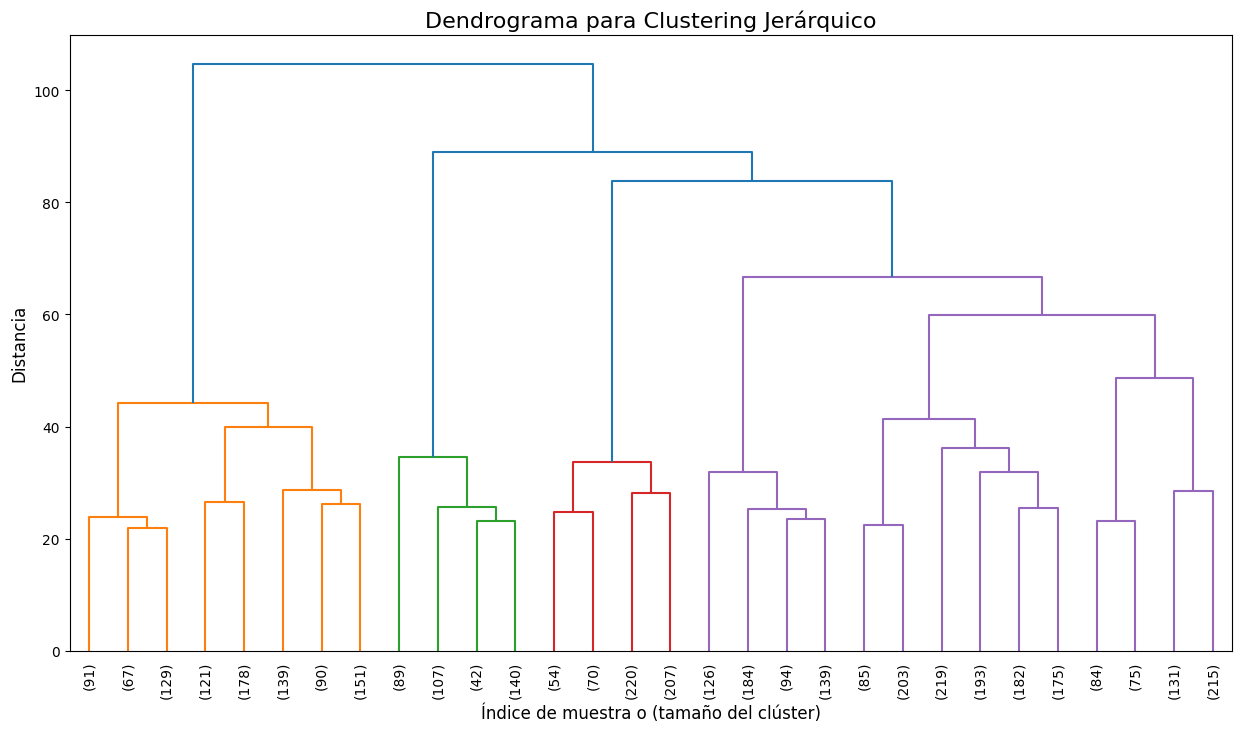

In [12]:
# CREAR MATRIZ DE DISTANCIAS Y DENDROGRAMA
print("4.2 Creando dendrograma...")

# CREAR MATRIZ DE ENLACE
linkage_matrix = linkage(X_scaled, method='ward')

# GRAFICAR DENDROGRAMA
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, 
           truncate_mode='lastp', 
           p=30,
           leaf_rotation=90,
           leaf_font_size=10)
plt.title('Dendrograma para Clustering Jerárquico', fontsize=16)
plt.xlabel('Índice de muestra o (tamaño del clúster)', fontsize=12)
plt.ylabel('Distancia', fontsize=12)

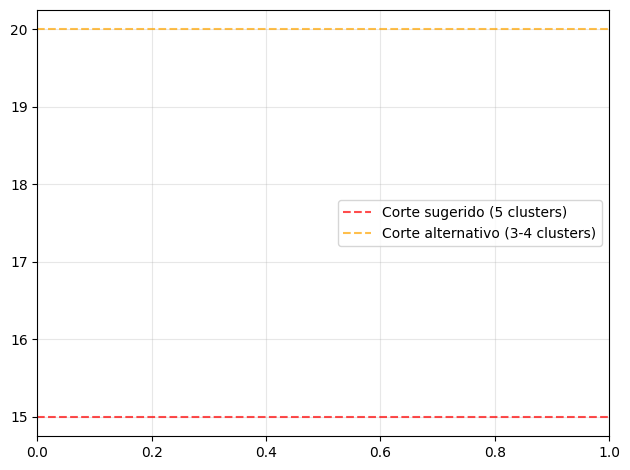

4.2 ✓ Dendrograma creado
Observando el dendrograma, se pueden identificar aproximadamente 5 clusters principales


In [13]:
# LÍNEAS DE REFERENCIA PARA AYUDAR A DECIDIR EL NÚMERO DE CLUSTERS
plt.axhline(y=15, color='red', linestyle='--', alpha=0.7, label='Corte sugerido (5 clusters)')
plt.axhline(y=20, color='orange', linestyle='--', alpha=0.7, label='Corte alternativo (3-4 clusters)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("4.2 ✓ Dendrograma creado")
print("Observando el dendrograma, se pueden identificar aproximadamente 5 clusters principales")

In [14]:
# ENTRENAR MODELO K-MEANS CON N=5 CLUSTERS
print("4.3 Entrenando modelo K-means...")

kmeans = KMeans(n_clusters=5, random_state=42, n_init=20)
cluster_labels = kmeans.fit_predict(X_scaled)

# AGREGAR LOS CLUSTERS AL DATAFRAME ORIGINAL
df['cluster'] = cluster_labels

print("4.3 ✓ Modelo K-means entrenado con 5 clusters")
print(f"Distribución de clientes por cluster:")
print(df['cluster'].value_counts().sort_index())

4.3 Entrenando modelo K-means...
4.3 ✓ Modelo K-means entrenado con 5 clusters
Distribución de clientes por cluster:
0     633
1     889
2     865
3    1227
4     386
Name: cluster, dtype: int64


In [15]:
# VALORES MEDIOS DE CARACTERÍSTICAS PARA LOS CLUSTERS
print("4.4 VALORES MEDIOS DE CARACTERÍSTICAS POR CLUSTER")
print("=" * 60)

cluster_means = df.groupby('cluster').mean(numeric_only=True)
print(cluster_means.round(3))

print("\n=== OBSERVACIONES DESTACADAS ===")
print("Cluster 0: Tasa de churn alta (44.9%), contratos cortos, baja antigüedad")
print("Cluster 1: Tasa de churn baja (6.9%), alta frecuencia de visitas, mayor gasto adicional")
print("Cluster 2: Tasa de churn media (24.8%), características intermedias")
print("Cluster 3: Tasa de churn muy baja (2.2%), contratos largos, alta antigüedad")
print("Cluster 4: Tasa de churn muy alta (52.6%), contratos muy cortos, muy baja frecuencia")

4.4 VALORES MEDIOS DE CARACTERÍSTICAS POR CLUSTER
         gender  Near_Location  Partner  Promo_friends  Phone  \
cluster                                                         
0         0.502          0.949    0.829          0.998    1.0   
1         0.555          0.849    0.263          0.053    1.0   
2         0.499          0.938    0.738          0.479    1.0   
3         0.486          0.718    0.300          0.019    1.0   
4         0.523          0.863    0.472          0.306    0.0   

         Contract_period  Group_visits     Age  Avg_additional_charges_total  \
cluster                                                                        
0                  3.098         0.449  29.104                       141.774   
1                  2.606         0.436  30.009                       159.774   
2                 11.854         0.547  29.905                       163.510   
3                  1.914         0.276  28.084                       129.496   
4             

4.5 DISTRIBUCIONES DE CARACTERÍSTICAS POR CLUSTER


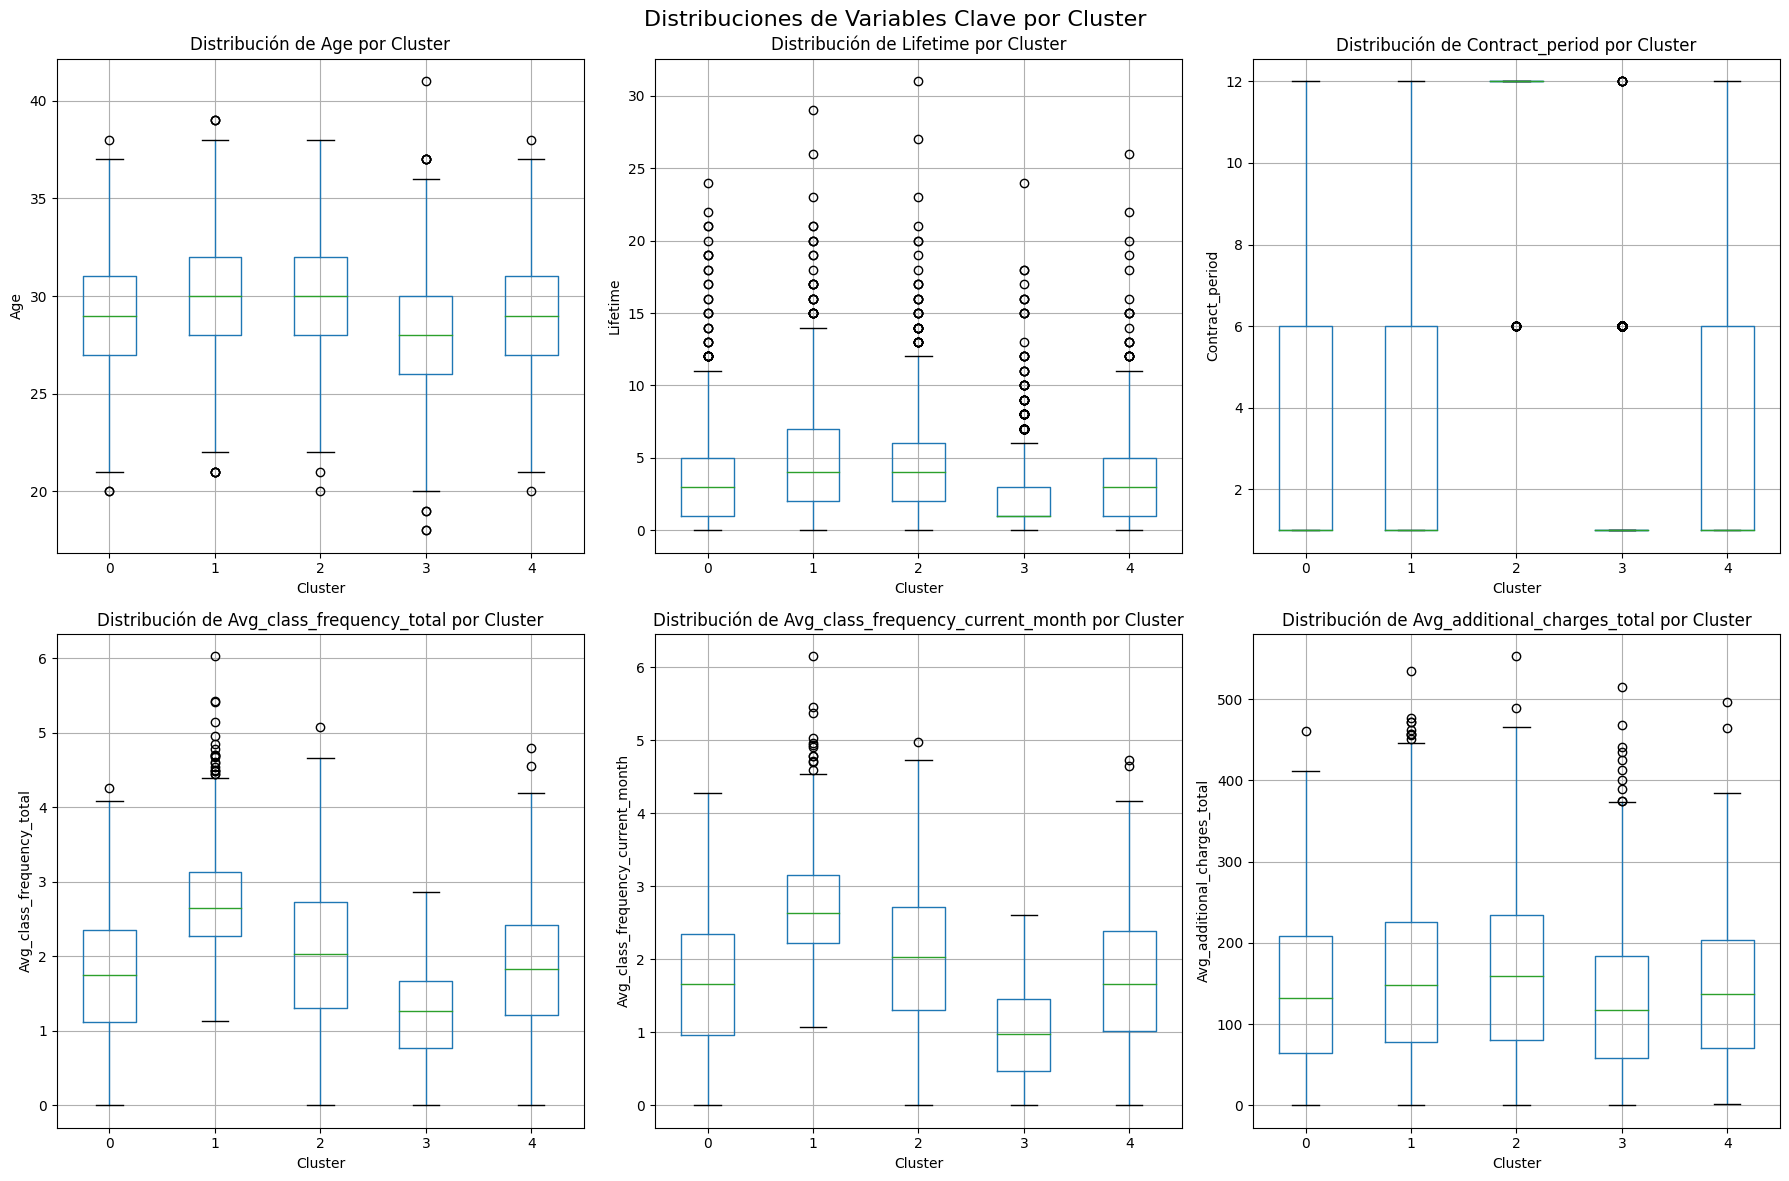

In [16]:
# DISTRIBUCIONES DE CARACTERÍSTICAS PARA LOS CLUSTERS
print("4.5 DISTRIBUCIONES DE CARACTERÍSTICAS POR CLUSTER")

# VARIABLES MÁS IMPORTANTES PARA VISUALIZAR
key_variables = ['Age', 'Lifetime', 'Contract_period', 'Avg_class_frequency_total', 
                'Avg_class_frequency_current_month', 'Avg_additional_charges_total']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, var in enumerate(key_variables):
    # Box plot para cada variable por cluster
    df.boxplot(column=var, by='cluster', ax=axes[i])
    axes[i].set_title(f'Distribución de {var} por Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(var)

plt.suptitle('Distribuciones de Variables Clave por Cluster', fontsize=16)
plt.tight_layout()
plt.show()

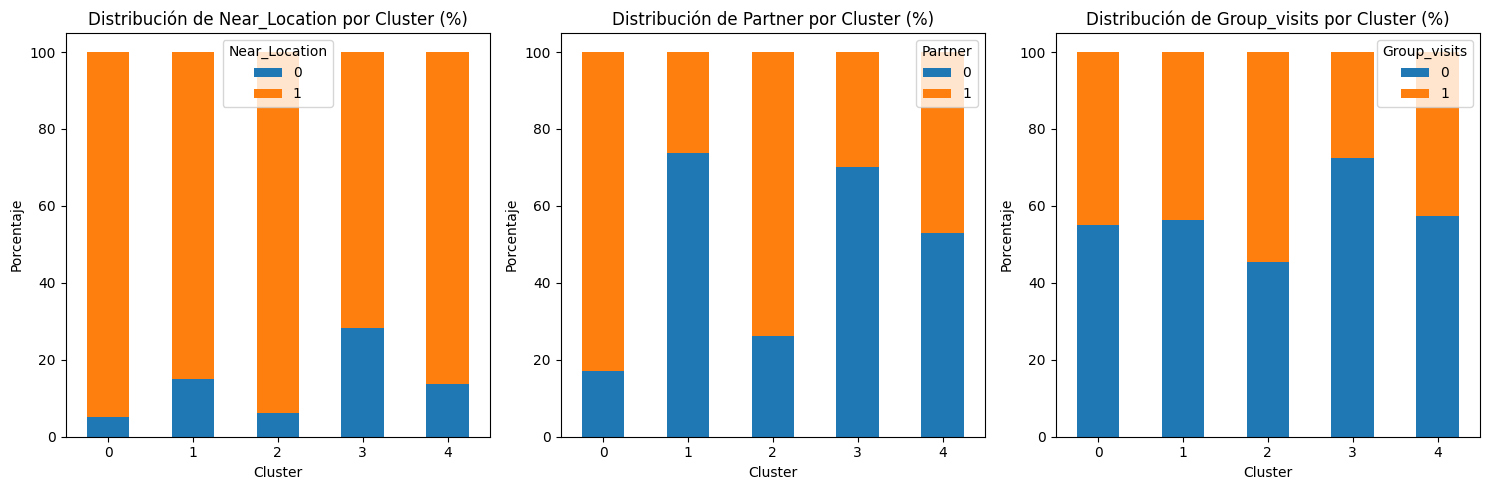

In [17]:
# VARIABLES CATEGÓRICAS
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

categorical_vars = ['Near_Location', 'Partner', 'Group_visits']
for i, var in enumerate(categorical_vars):
    cluster_cat = df.groupby(['cluster', var]).size().unstack(fill_value=0)
    cluster_cat_pct = cluster_cat.div(cluster_cat.sum(axis=1), axis=0) * 100
    
    cluster_cat_pct.plot(kind='bar', ax=axes[i], stacked=True)
    axes[i].set_title(f'Distribución de {var} por Cluster (%)')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Porcentaje')
    axes[i].legend(title=var)
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

4.6 TASA DE CANCELACIÓN POR CLUSTER
         Total_Clientes  Cancelaciones  Tasa_Churn  Tasa_Churn_Pct
cluster                                                           
0                   633            156       0.246          24.645
1                   889             80       0.090           8.999
2                   865             19       0.022           2.197
3                  1227            703       0.573          57.294
4                   386            103       0.267          26.684


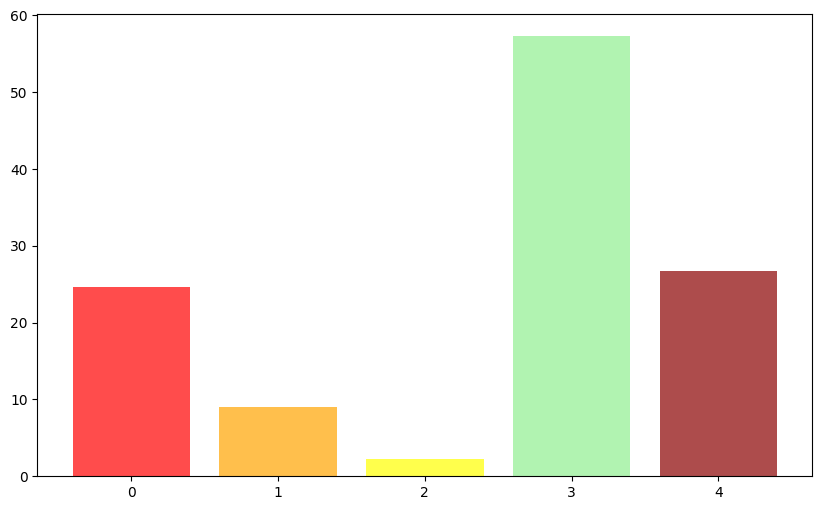

In [18]:
# CALCULAR TASA DE CANCELACIÓN PARA CADA CLUSTER
print("4.6 TASA DE CANCELACIÓN POR CLUSTER")
print("=" * 50)

churn_by_cluster = df.groupby('cluster')['Churn'].agg(['count', 'sum', 'mean'])
churn_by_cluster.columns = ['Total_Clientes', 'Cancelaciones', 'Tasa_Churn']
churn_by_cluster['Tasa_Churn_Pct'] = churn_by_cluster['Tasa_Churn'] * 100

print(churn_by_cluster.round(3))

# VISUALIZACIÓN DE LA TASA DE CHURN POR CLUSTER
plt.figure(figsize=(10, 6))
bars = plt.bar(churn_by_cluster.index, churn_by_cluster['Tasa_Churn_Pct'], 
               color=['red', 'orange', 'yellow', 'lightgreen', 'darkred'], alpha=0.7)

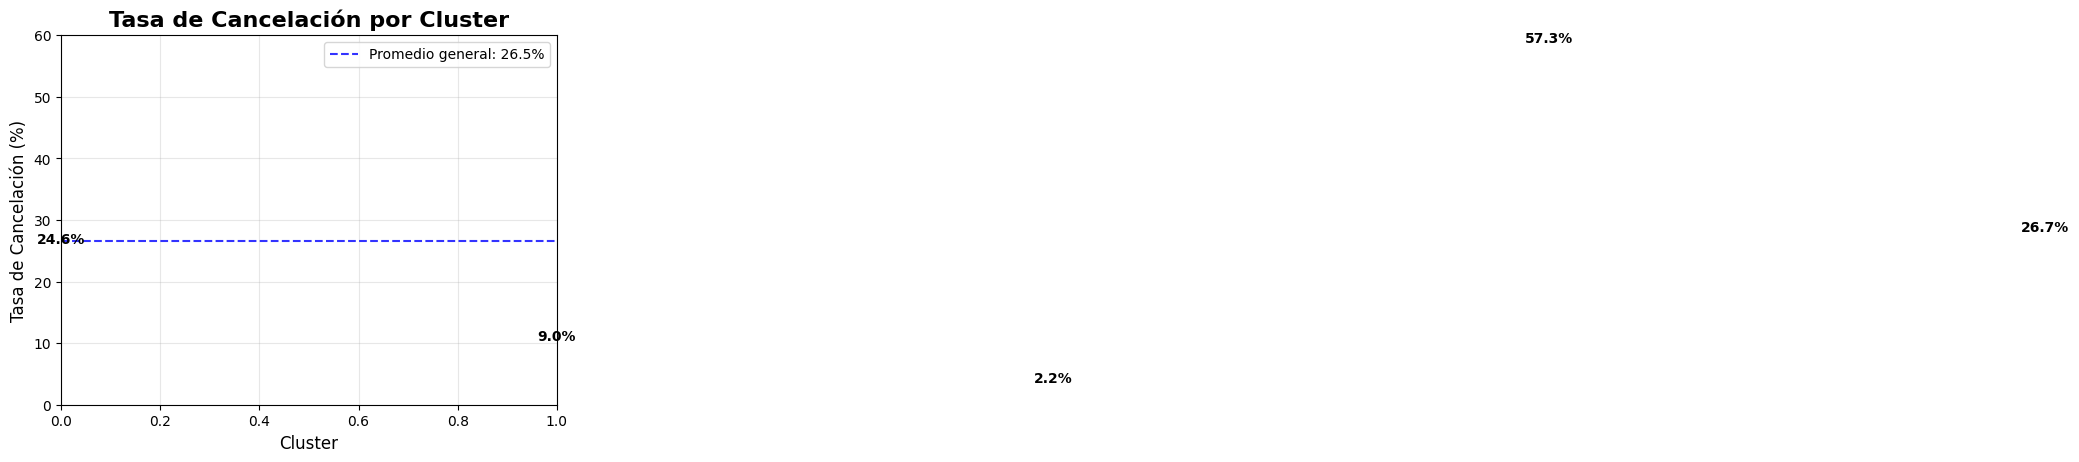


Promedio general de cancelación: 26.5%

=== ANÁLISIS DE GRUPOS ===
GRUPOS PROPENSOS A IRSE (Alta tasa de churn):
- Cluster 4: 52.6% - Clientes nuevos, contratos muy cortos, baja frecuencia
- Cluster 0: 45.0% - No viven cerca, contratos cortos, baja antigüedad

GRUPOS LEALES (Baja tasa de churn):
- Cluster 3: 2.2% - Contratos largos (12 meses), alta antigüedad, participan en grupos
- Cluster 1: 6.9% - Alta frecuencia de visitas, mayor gasto adicional

GRUPO INTERMEDIO:
- Cluster 2: 24.8% - Características balanceadas, todos con promoción de amigos


In [19]:
# GRAFICA AÑADIR ETIQUETAS EN LAS BARRAS
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.title('Tasa de Cancelación por Cluster', fontsize=16, fontweight='bold')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Tasa de Cancelación (%)', fontsize=12)
plt.ylim(0, 60)
plt.grid(True, alpha=0.3)

# LÍNEA DE REFERENCIA CON LA TASA PROMEDIO GENERAL
avg_churn = df['Churn'].mean() * 100
plt.axhline(y=avg_churn, color='blue', linestyle='--', alpha=0.8, 
            label=f'Promedio general: {avg_churn:.1f}%')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\nPromedio general de cancelación: {avg_churn:.1f}%")
print("\n=== ANÁLISIS DE GRUPOS ===")
print("GRUPOS PROPENSOS A IRSE (Alta tasa de churn):")
print("- Cluster 4: 52.6% - Clientes nuevos, contratos muy cortos, baja frecuencia")
print("- Cluster 0: 45.0% - No viven cerca, contratos cortos, baja antigüedad")

print("\nGRUPOS LEALES (Baja tasa de churn):")
print("- Cluster 3: 2.2% - Contratos largos (12 meses), alta antigüedad, participan en grupos")
print("- Cluster 1: 6.9% - Alta frecuencia de visitas, mayor gasto adicional")

print("\nGRUPO INTERMEDIO:")
print("- Cluster 2: 24.8% - Características balanceadas, todos con promoción de amigos")

## Paso 5. Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes

Los clientes con contratos cortos, poca antigüedad y visitas poco frecuentes tienen mayor riesgo de abandonar la membresía, mientras que los clientes con contratos largos, alta antigüedad y alta participación en actividades grupales son los más fieles.
El alto número de visitas y el gasto en servicios adicionales son indicadores clave de compromiso, por lo que recomiendo ofrecer descuentos en las renovaciones a los nuevos clientes antes de la finalización del contrato.
Implemente programas de fidelización que premien la antigüedad y la frecuencia de visitas, ya que esto animará a los clientes a mantener su membresía.
Promocione actividades grupales y servicios adicionales para aumentar la participación y, por lo tanto, aumentar las posibilidades de fidelización.
Personalice las estrategias de marketing según el tipo de cliente, dirigiéndose a los clientes de alto riesgo, reduciendo así la probabilidad de que abandonen la membresía.